In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Problem 6

**Problem Statement:** Write a `Matlab` function, called `Lagrange_poly` that inputs a set of data points $(x, y) = (\texttt{datx, daty})$, a set $x$ of numbers at which to interpolate, and outputs the polynomial interpolant, $y$, evaluated at $x$ using Lagrange polynomial interpolation.

<ol style="list-style-type: lower-alpha">
    <li>
        Use the code to interpolate the following functions:
        <ol style="list-style-type: lower-roman">
            <li>$f_1(x) = e^{-x^2}$</li>
            <li>$f_2(x) = \frac{1}{1 + x^2}$</li>
        </ol>
    </li>
</ol>

using the data points `datx=-3:1:3`. Interpolate at the points `x=-3:0.01:3`. Call $P_1$ the Lagrange interpolant of $f_1$ and $P_2$ the Lagrange interpolant of $f_2$. Repeat the experiment except using the data `datx1=-3:0.5:3`. Call in that case $P_3$ and $P_4$ the new interpolants. Compare the results.
For each interpolation problem, plot on the same graph the function, the two interpolants, and the data set. On a separate plot, plot the error between each interpolant `y` and `f(x)`.

In [2]:
def Lagrange_interp(x_data: list[float], y_data: list[float], x_interp: list[float]) -> list[float]:
    # check if data is same size
    if(len(x_data) != len(y_data)):
        print("Dataset lengths must match.")
        return

    # number of data points
    n = len(x_data)

    # zero array
    p_interp = x_interp * 0

    # polynomial formula
    for i in range(n):
        # define L_i
        L_i = np.array([1.] * len(x_interp))
        # do the product
        for j in range(n):
            if(i == j):
                continue
            L_i *= (x_interp - x_data[j]) / (x_data[i] - x_data[j])
        # remember this is a sum
        p_interp += y_data[i] * L_i

    return(p_interp)

In [3]:
f1 = lambda x: np.exp(-1*x**2)
f2 = lambda x: 1 / (1 + x**2)

In [4]:
xs = np.linspace(-3, 3, 601)
f1_true = f1(xs)
f2_true = f2(xs)

In [5]:
datx1 = np.linspace(-3, 3, 7)
datf1_1 = f1(datx1)
datf2_1 = f2(datx1)
P1 = Lagrange_interp(datx1, datf1_1, xs)
P2 = Lagrange_interp(datx1, datf2_1, xs)

datx2 = np.linspace(-3, 3, 13)
datf1_2 = f1(datx2)
datf2_2 = f2(datx2)
P3 = Lagrange_interp(datx2, datf1_2, xs)
P4 = Lagrange_interp(datx2, datf2_2, xs)

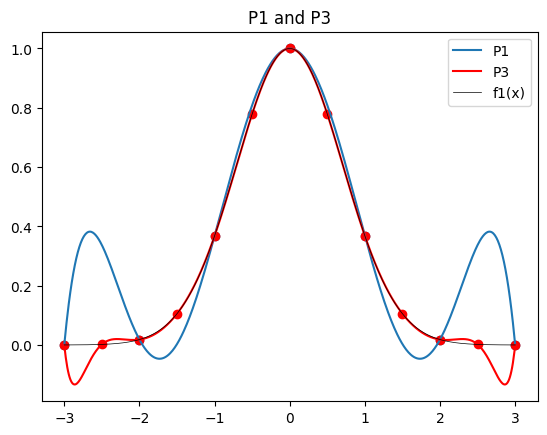

In [6]:
plt.plot(xs, P1)
plt.plot(xs, P3, color="red")
plt.plot(xs, f1_true, color="black", linewidth=0.5)
plt.scatter(datx1, datf1_1)
plt.scatter(datx2, datf1_2, color="red")
plt.title("P1 and P3")
plt.legend(["P1", "P3", "f1(x)"])
plt.show()

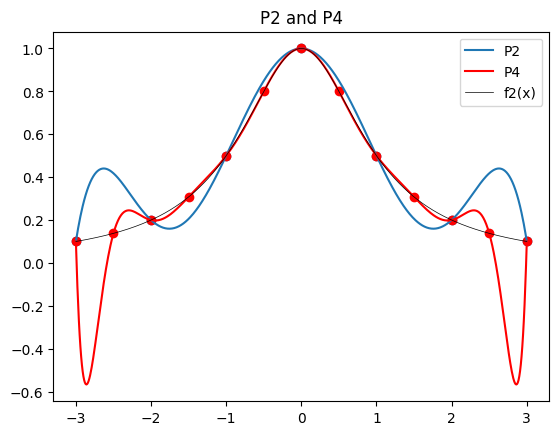

In [7]:
plt.plot(xs, P2)
plt.plot(xs, P4, color="red")
plt.plot(xs, f2_true, color="black", linewidth=0.5)
plt.scatter(datx1, datf2_1)
plt.scatter(datx2, datf2_2, color="red")
plt.title("P2 and P4")
plt.legend(["P2", "P4", "f2(x)"])
plt.show()

In [8]:
P1error = f1_true - P1
P2error = f2_true - P2
P3error = f1_true - P3
P4error = f2_true - P4

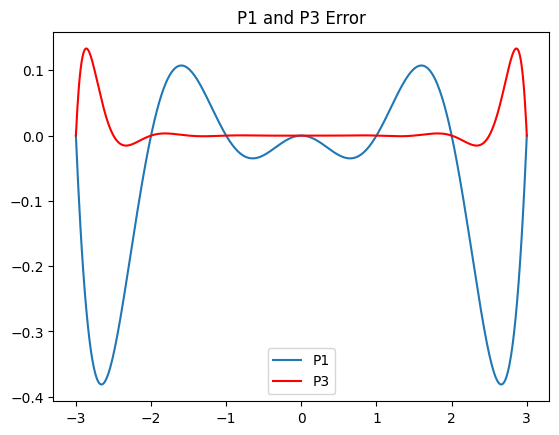

In [9]:
plt.plot(xs, P1error)
plt.plot(xs, P3error, color="red")
plt.title("P1 and P3 Error")
plt.legend(["P1", "P3"])
plt.show()

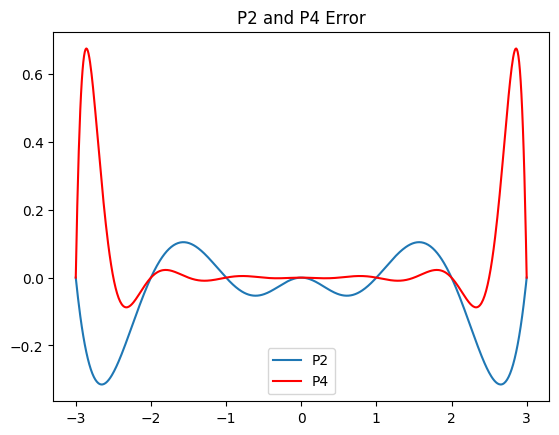

In [10]:
plt.plot(xs, P2error)
plt.plot(xs, P4error, color="red")
plt.title("P2 and P4 Error")
plt.legend(["P2", "P4"])
plt.show()

In the above error graphs, it is apparent that near the points provided to the interpolation function, the interpolation is more accurate. As you travel further from each point between the original data, however, the interpolation rapidly becomes inaccurate. The interpolations closer to the center data point provided to the function seem to be less subject to Runge's phenomenon.

# Problem 7

**Problem Statement:** Write a `Matlab` function, called `Linear_poly` that inputs a set of data points $(x, y) = (\texttt{datx, daty})$, a set $x$ of numbers at which to interpolate, and outputs the polynomial interpolant, $y$, evaluated at $x$ using Linear Spline interpolation.

<ol style="list-style-type: lower-alpha">
    <li>
        Use the code to interpolate the following functions:
        <ol style="list-style-type: lower-roman">
            <li>$f_1(x) = e^{-x^2}$</li>
            <li>$f_2(x) = \frac{1}{1 + x^2}$</li>
        </ol>
    </li>
</ol>

using the data points `datx=-3:1:3`. Interpolate at the points `x=-3:0.01:3`. Call $P_5$ the Linear Spline interpolant of $f_1$ and $P_6$ the Linear Spline interpolant of $f_2$. Repeat the experiment except using the data `datx1=-3:0.5:3`. Call in that case $P_7$ and $P_8$ the new interpolants. Compare the results.
For each interpolation problem, plot on the same graph the function, the two interpolants, and the data set. On a separate plot, plot the error between each interpolant `y` and `f(x)`.

In [11]:
def linear_spline(x_data: list[float], y_data: list[float], x_interp: list[float]) -> list[float]:
    # check if data is same size
    if(len(x_data) != len(y_data)):
        print("Dataset lengths must match.")
        return

    p_interp = x_interp.copy()
    for i, x in enumerate(x_interp):
        # get the two nearest values to interpolated value
        dist = [(xd, yd) for xd, yd in zip(x_data, y_data)]
        dist.sort(key=lambda k: abs(k[0] - x))
        important = dist[:2]
        # get the lower and upper nearest data points
        lowerx, lowery = min(important)
        higherx, highery = max(important)
        # calculate interpolated value
        p_interp[i] = (highery - lowery) / (higherx - lowerx) * (x - lowerx) + lowery

    return(p_interp)

In [12]:
P5 = linear_spline(datx1, datf1_1, xs)
P6 = linear_spline(datx1, datf2_1, xs)

P7 = linear_spline(datx2, datf1_2, xs)
P8 = linear_spline(datx2, datf2_2, xs)

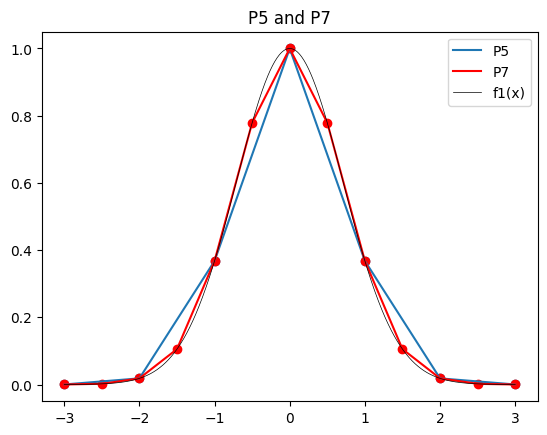

In [13]:
plt.plot(xs, P5)
plt.plot(xs, P7, color="red")
plt.plot(xs, f1_true, color="black", linewidth=0.5)
plt.scatter(datx1, datf1_1)
plt.scatter(datx2, datf1_2, color="red")
plt.title("P5 and P7")
plt.legend(["P5", "P7", "f1(x)"])
plt.show()

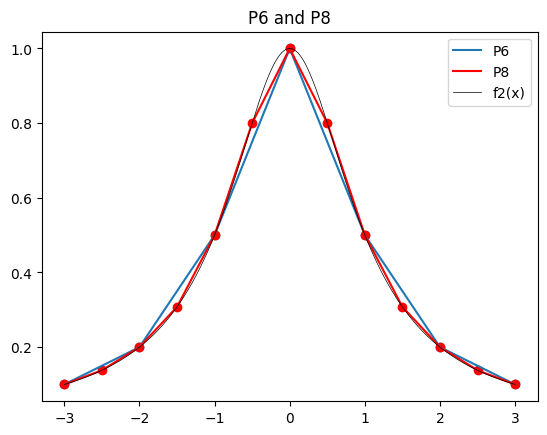

In [14]:
plt.plot(xs, P6)
plt.plot(xs, P8, color="red")
plt.plot(xs, f2_true, color="black", linewidth=0.5)
plt.scatter(datx1, datf2_1)
plt.scatter(datx2, datf2_2, color="red")
plt.title("P6 and P8")
plt.legend(["P6", "P8", "f2(x)"])
plt.show()

In [15]:
P5error = f1_true - P5
P6error = f2_true - P6
P7error = f1_true - P7
P8error = f2_true - P8

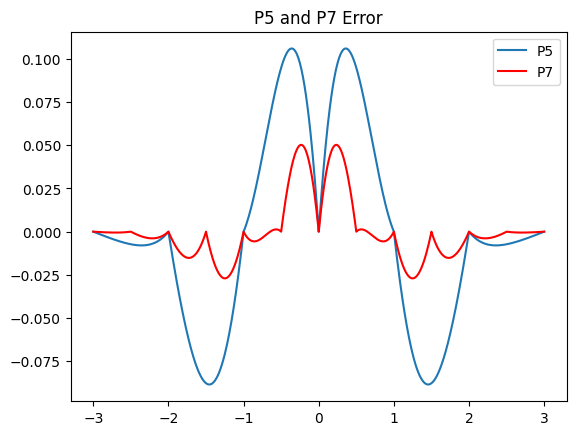

In [16]:
plt.plot(xs, P5error)
plt.plot(xs, P7error, color="red")
plt.title("P5 and P7 Error")
plt.legend(["P5", "P7"])
plt.show()

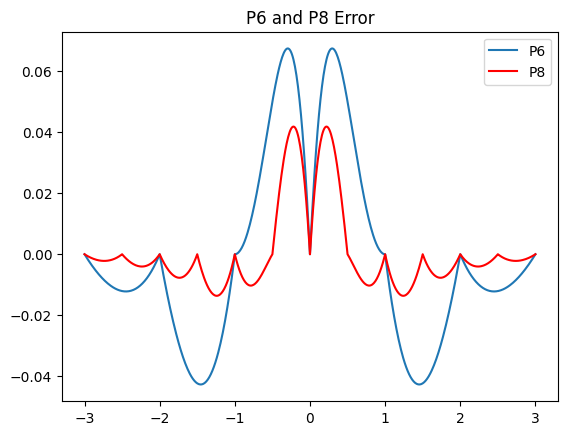

In [17]:
plt.plot(xs, P6error)
plt.plot(xs, P8error, color="red")
plt.title("P6 and P8 Error")
plt.legend(["P6", "P8"])
plt.show()

In the above error graphs, it is apparent that near the points provided to the interpolation function, the interpolation is more accurate. As you travel further from each point between the original data, however, the capacity for error grows. In some cases, the error approaches zero in areas that don't have a  The interpolations closer to the center data point provided to the function seem to be less subject to Runge's phenomenon.

# Problem 8

Write a `Matlab` function called `least_squares` which inputs a set of data points $(x, y) = \texttt{(datx, daty)}$, the degree of polynomial $n$, and outputs the coefficients $a_i$ as a vector.

Write a second function called `exp_least_squares` which computes the exponential components for least squares as $p_2(x) = a_0e^{a_1x}$ and outputs $a = (a_0, a_1)$.

Write also at the top of the script an anonymous function `N(d)` which uses a normal distribution.

To create `daty` in each case, add `N(0.5)` to each data point.

<ol style="list-style-type: lower-alpha">
    <li>Use the code to approximate the functions
    <ol style="list-style-type: lower-roman">
        <li>$f_1(x) = 2x + 4$ on $[0, 4]$ using $n = 1$.</li>
        <li>$f_2(x) = x^2 - 3x + 1$ on $[1, 5]$ using $n = 2$.</li>
    </ol>
    </li>
    <li>Use the code to approximate
    <ol style="list-style-type: lower-roman">
        <li>$f_3(x) = 3e^{0.25x}$ on $[0, 10]$</li>
    </ol>
    </li>
</ol>

In [18]:
def least_squares(datx: list[float], daty: list[float], n: int) -> list[float]:
    # Create the Vandermonde matrix
    X = np.vander(datx, n+1)

    # this was conspicuously easy...
    coefficients = np.linalg.solve(X.T @ X, X.T @ daty)
    
    return(coefficients)

In [5]:
def exp_least_squares(datx: list[float], daty: list[float]) -> list[float]:
    # Linearize the problem
    log_daty = np.log(daty)
    
    # Prepare the design matrix for the linear regression
    # solving for log(y) = b0 + b1 * x
    X = np.vstack([np.ones_like(datx), datx]).T
    
    # Solve the least squares problem using numpy's lstsq method
    b, _, _, _ = np.linalg.lstsq(X, log_daty, rcond=None)
    
    # Extract coefficients
    b0 = b[0]
    b1 = b[1]
    
    # Convert back to the original a0 and a1
    a0 = np.exp(b0)
    a1 = b1
    
    return(a0, a1)

In [28]:
f1 = lambda x: 2*x + 4
f2 = lambda x: x**2 - 3*x + 1
f3 = lambda x: 3*np.exp(0.25*x)

In [50]:
xsf1 = np.linspace(0, 4, 1000)
xsf2 = np.linspace(1, 5, 1000)
xsf3 = np.linspace(0, 10, 1000)
ysf1 = np.array([random.gauss(f1(i)) for i in xsf1])
ysf2 = np.array([random.gauss(f2(i)) for i in xsf2])
ysf3 = np.array([random.gauss(f3(i)) for i in xsf3])

In [51]:
least_squares(xsf1, ysf1, 1)

array([2.02068922, 3.9600935 ])

In [52]:
least_squares(xsf2, ysf2, 2)

array([ 0.99002543, -2.93432164,  0.95027811])

In [53]:
exp_least_squares(xsf3, ysf3)

(np.float64(2.9895214802515824), np.float64(0.2506522383932935))